In [1]:
import numpy as np

In [2]:
from sklearn.datasets import make_blobs

In [4]:
dataset = make_blobs(n_features=7)

In [5]:
data = dataset[0]

In [7]:
data = np.abs(data)

In [8]:
import pandas as pd 

In [9]:
data = pd.DataFrame(data, columns=['f1','f2','f3','f4','f5','f6','Qos'])

In [11]:
X = data.drop(['Qos'],axis=1)
y = data['Qos']

In [12]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
qos = lr.predict(X_test)

In [22]:
qos

array([ 5.63248189,  6.80041316, -0.69560899,  8.23131373,  7.97050062,
        6.61477386,  5.94426764, -0.05222487,  0.93051408,  2.17407642,
        2.53840874,  6.37187436,  7.7266358 ,  8.31242902,  0.52977673,
        7.73450871,  7.72528815,  6.22859632,  7.4728769 ,  7.12829771,
        6.65971698,  2.05434699,  7.96530831,  6.81009036,  8.0568459 ,
        7.59009585,  1.30428106,  0.52530177,  1.20499809,  7.66051203])

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=1)

In [25]:
rdata = pca.fit_transform(X_test)

In [27]:
rdata = pd.DataFrame(rdata,columns=['component1'])

In [28]:
qos = pd.DataFrame(qos, columns=['QoS'])

In [29]:
newdata = pd.concat([rdata,qos],axis=1)

In [30]:
newdata.head()

,component1,QoS
0,-1.590176,5.632482
1,-1.052326,6.800413
2,-2.447954,-0.695609
3,-0.842080,8.231314
4,2.878756,7.970501


In [31]:
import matplotlib.pyplot as plt

In [32]:
plt.style.use('ggplot')

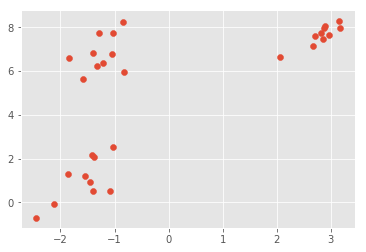

In [33]:
plt.scatter(newdata['component1'],newdata['QoS'])

In [34]:
from sklearn.cluster import KMeans

In [35]:
km = KMeans(n_clusters=1)

In [36]:
km.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
km.cluster_centers_

array([[-5.92118946e-17,  5.17168991e+00]])

In [42]:
wcss = []
for i in range(2,20):
    km = KMeans(i)
    km.fit(newdata)
    wcss.append(km.inertia_)

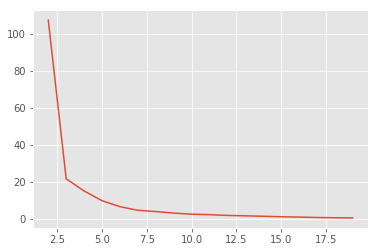

In [43]:
plt.plot(range(2,20),wcss)

In [54]:
km = KMeans(n_clusters=3)

In [55]:
km.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
km.labels_
km.cluster_centers_

array([[ 2.81699378,  7.65418715],
       [-1.57503222,  1.051387  ],
       [-1.24196156,  6.80949558]])

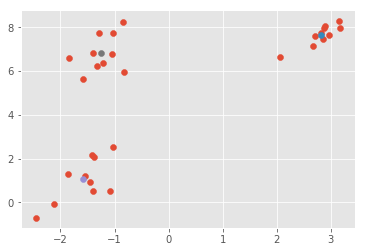

In [59]:
plt.scatter(newdata['component1'],newdata['QoS'])
plt.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1])
plt.scatter(km.cluster_centers_[1][0],km.cluster_centers_[1][1])
plt.scatter(km.cluster_centers_[2][0],km.cluster_centers_[2][1])


In [50]:
import matplotlib.patches.

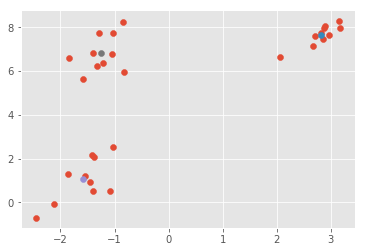

In [62]:
fig, ax = plt.subplots()
ax.scatter(newdata['component1'],newdata['QoS'])
ax.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1])
ax.scatter(km.cluster_centers_[1][0],km.cluster_centers_[1][1])
ax.scatter(km.cluster_centers_[2][0],km.cluster_centers_[2][1])
